Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import plot_tree

Generate synthetic binary classification dataset using numpy. Create a dataset of 1000 samples with two features

In [5]:
np.random.seed(42)  # For reproducibility

X = np.random.rand(1000, 2)  # Random feature values between 0 and 1 (2 features)
y = (2 * X[:, 0] + 3 * X[:, 1] > 2).astype(int)  # Class label: 1 if linear combination > 2, else 0

Split the data into training and testing sets (80% training, 20% testing)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize the Random Forest Classifier
The Random Forest classifier is an ensemble of Decision Trees.
It uses the bagging technique (bootstrap aggregating) to create different trees on different random samples of the dataset.

In [7]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, bootstrap=True)

Fit the model using the training data

In [8]:
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

Predict on the test data

In [9]:
y_pred = model.predict(X_test)

Essential Metrics Calculation

Accuracy

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975


Precision

In [11]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9696969696969697


Recall

In [12]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9922480620155039


F1 Score

In [13]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9808429118773946


Confusion Matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 67   4]
 [  1 128]]


Visualizing the Feature Importance

Random Forests provide the feature importance, showing which features contributed the most to the model

In [15]:
feature_importances = model.feature_importances_
print("\nFeature Importances:", feature_importances)


Feature Importances: [0.34216268 0.65783732]


Plot the feature importance

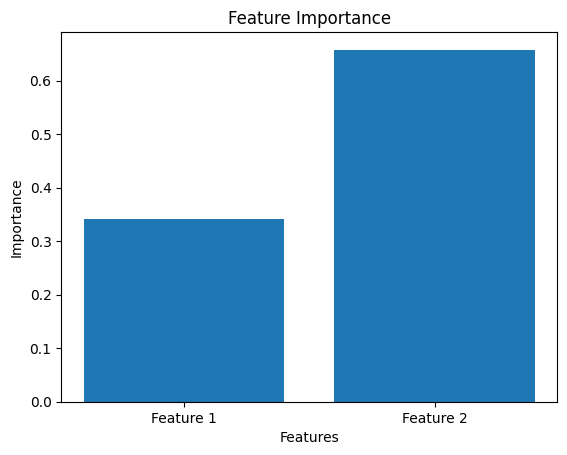

In [16]:
plt.bar(['Feature 1', 'Feature 2'], feature_importances)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

 Visualizing One of the Decision Trees in the Forest
 Random Forest is composed of multiple decision trees. Let's visualize one of them.

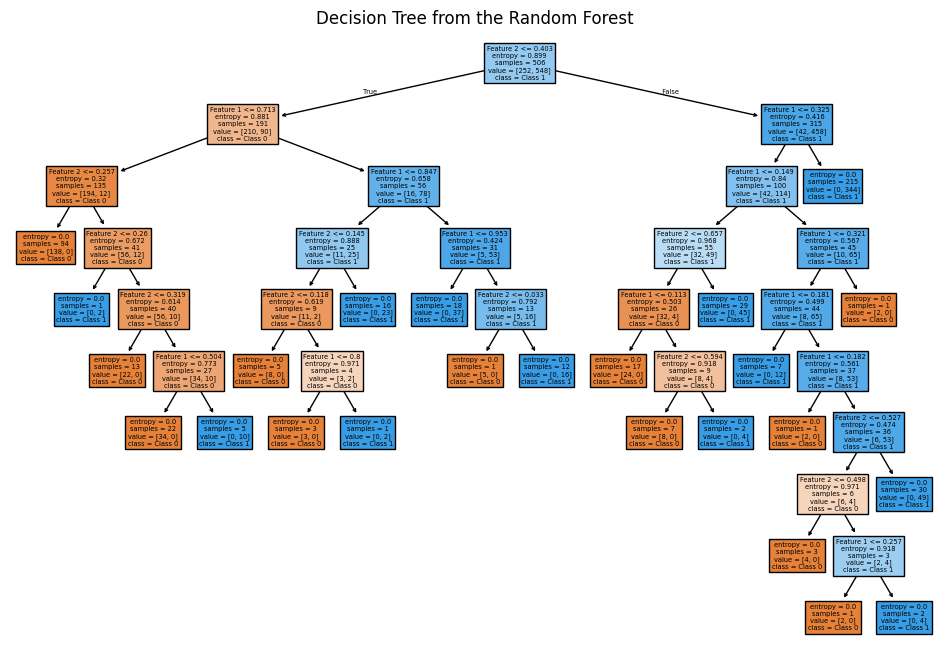

In [17]:
plt.figure(figsize=(12, 8))  # Set plot size
tree = model.estimators_[0]  # Grab the first tree in the forest
plot_tree(tree, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree from the Random Forest")
plt.show()

Additional Explanation of Bagging:
Random Forest uses bagging (bootstrap aggregation) to build several decision trees.
Each tree is trained on a random subset (with replacement) of the data, which introduces diversity in the trees.
This makes the Random Forest model more robust and less prone to overfitting compared to individual decision trees.

Additional Metrics:
Gini Index or Entropy (used in splits of individual trees):
Since we used 'entropy' as the criterion, the trees in the forest use entropy to determine the best splits.